In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcyberpunk

plt.style.use("cyberpunk")

In [13]:
df_columns = ["group", "timestamp", "exercise", "kg", "reps"]
all_exercises = pd.read_csv("../gymbot/logs/7c19a68b332d29a5a7dcb8a1e81a6dc4.csv", names=df_columns)
all_exercises = all_exercises.astype({"timestamp": "datetime64[s]"})

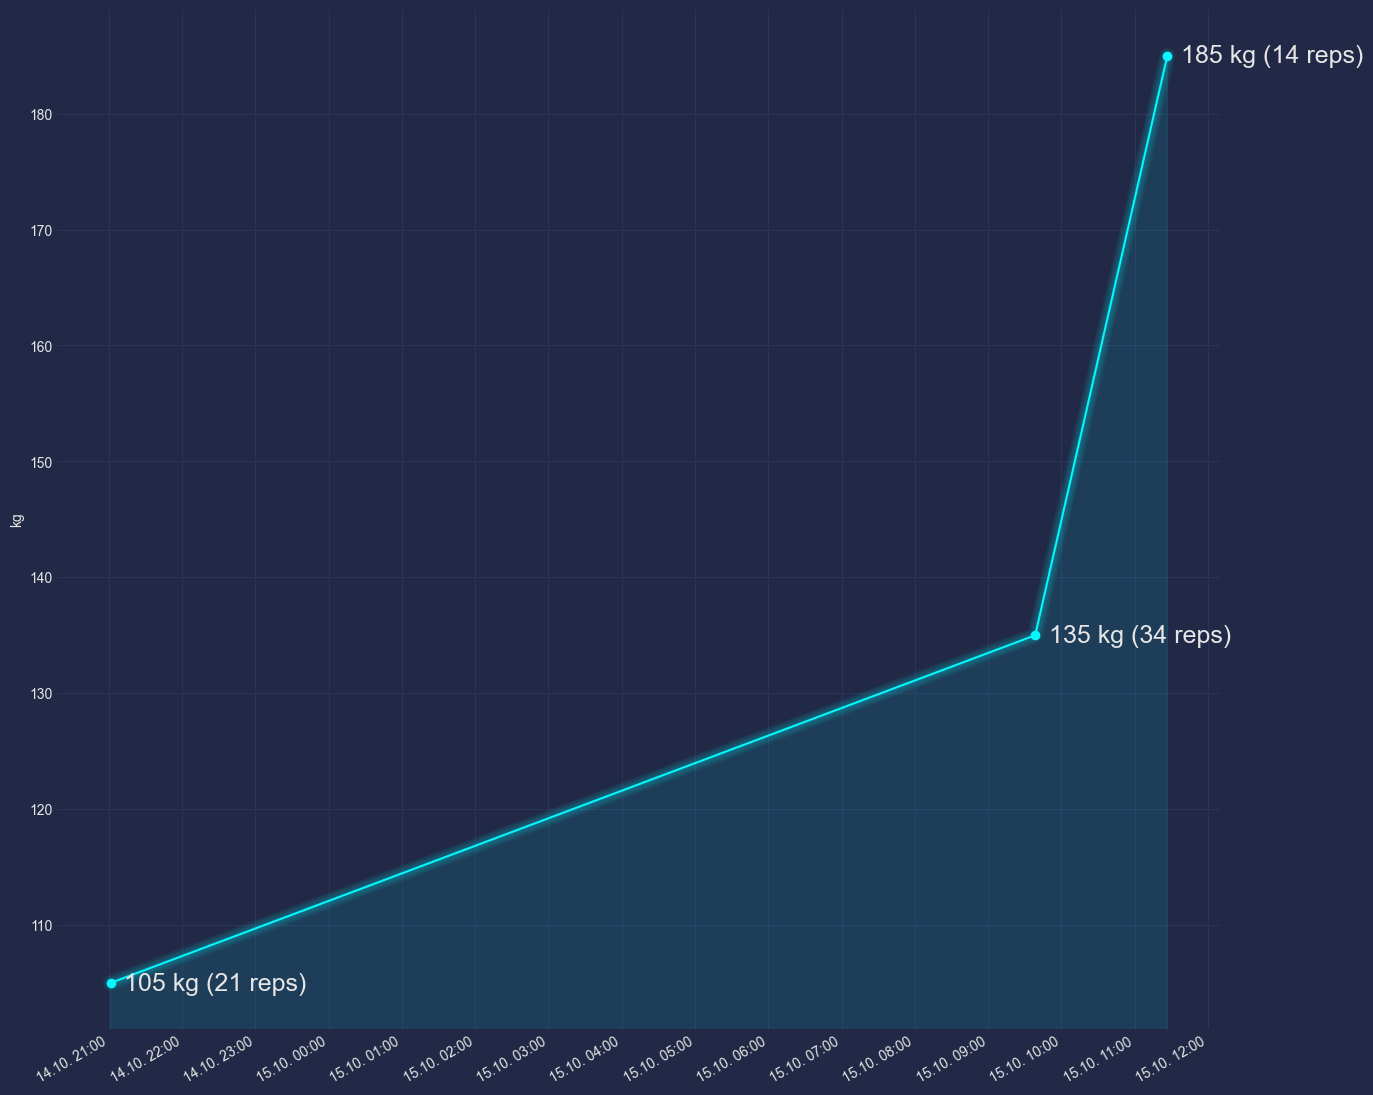

In [30]:
for c in all_exercises["exercise"].unique():
    resampled = all_exercises.drop("group", axis=1)
    resampled = resampled[resampled.exercise == c].drop("exercise", axis=1)
    drawstyle = "default"
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(resampled.timestamp, resampled.kg, drawstyle=drawstyle)
    ax.scatter(resampled.timestamp, resampled.kg)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m. %H:%M"))
    plt.gcf().autofmt_xdate()
    plt.ylabel("kg")

    for i, point in resampled.iterrows():
        ax.annotate(f'{point["kg"]} kg ({point["reps"]} reps)', (point["timestamp"], point["kg"]),
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18)
    
    mplcyberpunk.add_glow_effects()
    plt.show()

In [15]:
resampled

,timestamp,kg
0,2023-10-14 21:01:18,105
1,2023-10-15 09:38:36,135
2,2023-10-15 11:26:49,185
